In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

In [2]:
file_path = 'South_East_Asia_Social_Media_MentalHealth.csv'
data = pd.read_csv(file_path)

data.head().T

,0,1,2,3,4
Country,Myanmar,Indonesia,Vietnam,Philippines,Laos
Age Group,18-25,18-25,36-45,26-35,56-65
Gender,Male,Female,Male,Male,Male
Urban/Rural,Rural,Urban,Rural,Urban,Rural
Daily SM Usage (hrs),2.89,3.24,7.84,1.25,3.94
Most Used SM Platform,WeChat,Instagram,Instagram,WeChat,Facebook
Frequency of SM Use,Weekly,Rarely,Daily,Rarely,Daily
Likes Received (per post),652,295,412,387,148
Comments Received (per post),80,429,64,309,45
Shares Received (per post),226,45,2,273,180


In [3]:
# 1. Checking for missing values
print("Missing Values in each column:")
data.isnull().sum()

Missing Values in each column:


Country                             0
Age Group                           0
Gender                              0
Urban/Rural                         0
Daily SM Usage (hrs)                0
Most Used SM Platform               0
Frequency of SM Use                 0
Likes Received (per post)           0
Comments Received (per post)        0
Shares Received (per post)          0
Peer Comparison Frequency (1-10)    0
Social Anxiety Level (1-10)         0
Socioeconomic Status                0
Education Level                     0
State                               0
Body Image Impact (1-10)            0
Sleep Quality Impact (1-10)         0
Self Confidence Impact (1-10)       0
Cyberbullying Experience (1-10)     0
Anxiety Levels (1-10)               0
dtype: int64

In [4]:
# Handling missing values by imputing median for numerical columns
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns

for col in numerical_columns:
    data[col] = data[col].fillna(data[col].median())

# Handling missing values by imputing mode for categorical columns
for col in data.select_dtypes(include=['object']).columns:
    data[col] = data[col].fillna(data[col].mode()[0])

print("Missing Values After Handling:")
data.isnull().sum()

Missing Values After Handling:


Country                             0
Age Group                           0
Gender                              0
Urban/Rural                         0
Daily SM Usage (hrs)                0
Most Used SM Platform               0
Frequency of SM Use                 0
Likes Received (per post)           0
Comments Received (per post)        0
Shares Received (per post)          0
Peer Comparison Frequency (1-10)    0
Social Anxiety Level (1-10)         0
Socioeconomic Status                0
Education Level                     0
State                               0
Body Image Impact (1-10)            0
Sleep Quality Impact (1-10)         0
Self Confidence Impact (1-10)       0
Cyberbullying Experience (1-10)     0
Anxiety Levels (1-10)               0
dtype: int64

In [5]:
# 2. Detecting and Handling Outliers
# Use boxplots to visualize outliers in numerical columns
def detect_outliers_iqr(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = series[(series < lower_bound) | (series > upper_bound)]
    return outliers

Daily SM Usage (hrs) has 0 outliers
Likes Received (per post) has 0 outliers
Comments Received (per post) has 0 outliers
Shares Received (per post) has 0 outliers
Peer Comparison Frequency (1-10) has 0 outliers
Social Anxiety Level (1-10) has 0 outliers
Body Image Impact (1-10) has 0 outliers
Sleep Quality Impact (1-10) has 0 outliers
Self Confidence Impact (1-10) has 0 outliers
Cyberbullying Experience (1-10) has 0 outliers
Anxiety Levels (1-10) has 0 outliers


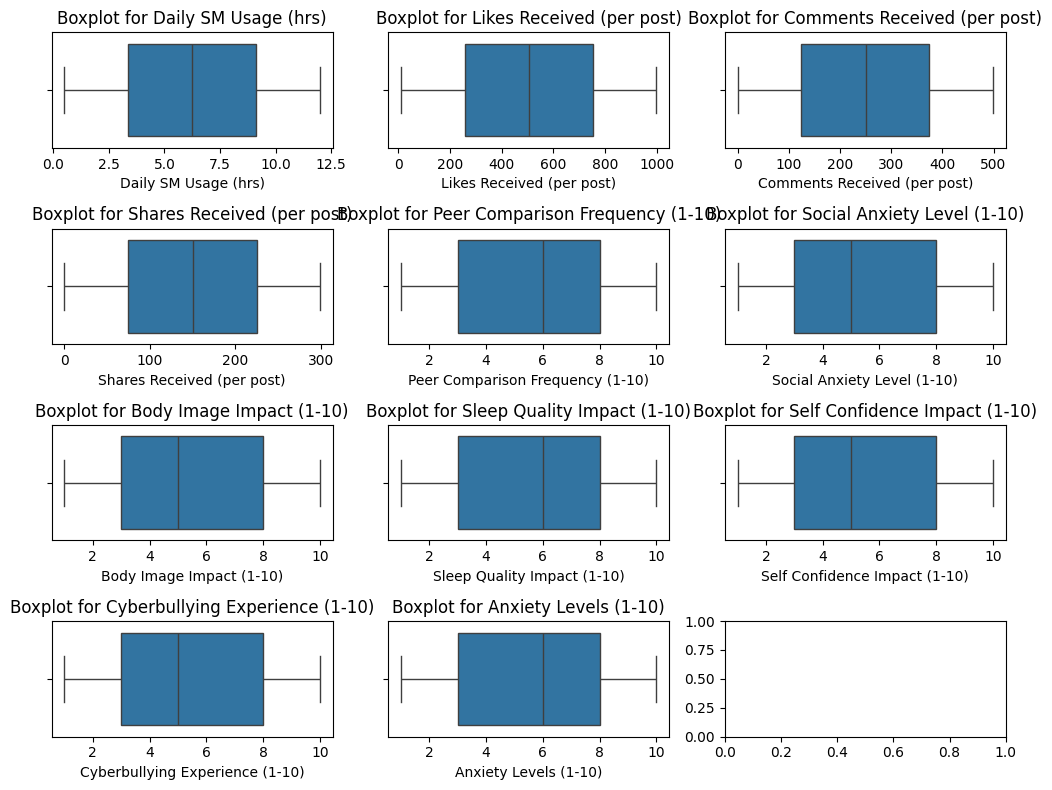

In [6]:
# Numerical columns
numerical_columns = ['Daily SM Usage (hrs)', 'Likes Received (per post)', 'Comments Received (per post)', 
                     'Shares Received (per post)', 'Peer Comparison Frequency (1-10)', 
                     'Social Anxiety Level (1-10)', 'Body Image Impact (1-10)', 
                     'Sleep Quality Impact (1-10)', 'Self Confidence Impact (1-10)', 
                     'Cyberbullying Experience (1-10)', 'Anxiety Levels (1-10)']

# Create subplots
n_cols = 3
n_rows = (len(numerical_columns) // n_cols) + (len(numerical_columns) % n_cols > 0)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(10, 2 * n_rows))
axes = axes.flatten()

for i, col in enumerate(numerical_columns):
    if col in data.columns:
        sns.boxplot(x=data[col], ax=axes[i])
        axes[i].set_title(f'Boxplot for {col}')
        
        outliers = detect_outliers_iqr(data[col].dropna())
        print(f"{col} has {len(outliers)} outliers")

plt.tight_layout()
plt.show()

In [7]:
# Handle outliers using IQR if there are any
#for col in numerical_columns:
#    Q1 = data[col].quantile(0.25)
#    Q3 = data[col].quantile(0.75)
#    IQR = Q3 - Q1
 #   lower_bound = Q1 - 1.5 * IQR
 #   upper_bound = Q3 + 1.5 * IQR
 #   data[col] = np.where(data[col] < lower_bound, lower_bound, data[col])
  #  data[col] = np.where(data[col] > upper_bound, upper_bound, data[col])

In [8]:
# Save the preprocessed data
data.to_csv('Preprocessed_Dataset.csv', index=False)

file_path = 'Preprocessed_Dataset.csv'
data = pd.read_csv(file_path)

In [9]:
data.head()

,Country,Age Group,Gender,Urban/Rural,Daily SM Usage (hrs),Most Used SM Platform,Frequency of SM Use,Likes Received (per post),Comments Received (per post),Shares Received (per post),Peer Comparison Frequency (1-10),Social Anxiety Level (1-10),Socioeconomic Status,Education Level,State,Body Image Impact (1-10),Sleep Quality Impact (1-10),Self Confidence Impact (1-10),Cyberbullying Experience (1-10),Anxiety Levels (1-10)
0,Myanmar,18-25,Male,Rural,2.89,WeChat,Weekly,652,80,226,1,1,High,High School,Mandalay,7,1,8,6,6
1,Indonesia,18-25,Female,Urban,3.24,Instagram,Rarely,295,429,45,8,2,High,Doctorate,Jakarta,6,4,5,3,3
2,Vietnam,36-45,Male,Rural,7.84,Instagram,Daily,412,64,2,8,10,High,Bachelor's,Da Nang,3,8,6,2,3
3,Philippines,26-35,Male,Urban,1.25,WeChat,Rarely,387,309,273,1,7,Middle,High School,Manila,2,3,3,10,2
4,Laos,56-65,Male,Rural,3.94,Facebook,Daily,148,45,180,10,10,Low,Bachelor's,Pakse,9,2,6,3,6


In [10]:
# 3. Data Transformation
#Categorize the 'Age Group' column into 'Youth', 'Adult', and 'Senior' categories
data['Age Category'] = data['Age Group'].apply(lambda age: 'Youth' if age in ['18-25', '26-35'] else ('Adult' if age in ['36-45', '46-55'] else 'Senior'))

print("\nDataset with 'Age Category' column:")
data[['Age Group', 'Age Category']].head()

#Combine 'Likes Received (per post)', 'Comments Received (per post)', and 'Shares Received (per post)' into 'Total Social Interaction'
data['Total Social Interaction'] = data['Likes Received (per post)'] + data['Comments Received (per post)'] + data['Shares Received (per post)']

data[['Likes Received (per post)', 'Comments Received (per post)', 'Shares Received (per post)', 'Total Social Interaction']].head()

# Create a new column 'Usage Intensity' based on 'Daily SM Usage (hrs)'
data['Usage Intensity'] = data['Daily SM Usage (hrs)'].apply(lambda hours: 'Low' if hours < 2 else 'Medium' if hours < 5 else 'High')

print("\nDataset with 'Usage Intensity' column:")
data[['Daily SM Usage (hrs)', 'Usage Intensity']].head()


Dataset with 'Age Category' column:

Dataset with 'Usage Intensity' column:


,Daily SM Usage (hrs),Usage Intensity
0,2.89,Medium
1,3.24,Medium
2,7.84,High
3,1.25,Low
4,3.94,Medium


In [11]:
# Categorize Social Anxiety Level into Low, Medium, High
data['Social_Anxiety_Category'] = pd.cut(data['Social Anxiety Level (1-10)'], bins=[0, 3, 7, 10], labels=['Low', 'Medium', 'High'], right=True)

# Check the distribution of the new target variable
print("Class distribution in the new target variable:")
print(data['Social_Anxiety_Category'].value_counts())

Class distribution in the new target variable:
Social_Anxiety_Category
Medium    136027
Low       102842
High      102047
Name: count, dtype: int64


In [12]:
# 3. Data Transformation
# Data Encoding for Categorical Variables

encoder = LabelEncoder()

# Encoding 'Social_Anxiety_Category' column
data['Social_Anxiety_Category'] = encoder.fit_transform(data['Social_Anxiety_Category'])
print(f"\nEncoding for 'Social_Anxiety_Category':")
encoding_map_sac = pd.DataFrame({
    'Original': encoder.classes_,
    'Encoded': range(len(encoder.classes_))
})
print(encoding_map_sac)


Encoding for 'Social_Anxiety_Category':
  Original  Encoded
0     High        0
1      Low        1
2   Medium        2


In [13]:
data = data.drop(columns=['Social Anxiety Level (1-10)'])

In [14]:
# 3. Data Transformation
# Data Encoding for Categorical Variables
# # Initialize the LabelEncoder
encoder = LabelEncoder()

# Define columns to encode (combining the columns from both snippets)
encode_columns = [
    'Urban/Rural', 'Gender', 'Frequency of SM Use', 'Education Level', 
    'Country', 'Socioeconomic Status', 'State', 'Age Category', 'Usage Intensity',
    'Most Used SM Platform'  # Add the new column here
]

# Create a dictionary to store encoding maps
encoding_maps = {}

# Add header
print("\n============================== Data Encoding ==============================\n")

# Loop through each column and encode it
for column in encode_columns:
    # Fit and transform the column
    data[column] = encoder.fit_transform(data[column])
    
    # Store the encoding map for reference
    encoding_maps[column] = dict(zip(encoder.classes_, range(len(encoder.classes_))))
    
    # Print the encoding details in a formatted table
    print(f"\n------------------------------- Encoding for '{column}' -------------------------------")
    encoding_map = pd.DataFrame({
        'Original': encoder.classes_,
        'Encoded': range(len(encoder.classes_))
    })
    
    # Printing in a tabular format with headers
    print(encoding_map.to_string(index=False))
    print("\n---------------------------------------------------------------------------------------------")

# Final footer
print("\n=============================== Encoding Completed ===============================\n")


============================== Data Encoding ==============================


------------------------------- Encoding for 'Urban/Rural' -------------------------------
Original  Encoded
   Rural        0
   Urban        1

---------------------------------------------------------------------------------------------

------------------------------- Encoding for 'Gender' -------------------------------
Original  Encoded
  Female        0
    Male        1

---------------------------------------------------------------------------------------------

------------------------------- Encoding for 'Frequency of SM Use' -------------------------------
Original  Encoded
   Daily        0
 Monthly        1
  Rarely        2
  Weekly        3

---------------------------------------------------------------------------------------------

------------------------------- Encoding for 'Education Level' -------------------------------
   Original  Encoded
 Bachelor's        0
  Doctorate        1
H

In [15]:
data.head()

,Country,Age Group,Gender,Urban/Rural,Daily SM Usage (hrs),Most Used SM Platform,Frequency of SM Use,Likes Received (per post),Comments Received (per post),Shares Received (per post),...,State,Body Image Impact (1-10),Sleep Quality Impact (1-10),Self Confidence Impact (1-10),Cyberbullying Experience (1-10),Anxiety Levels (1-10),Age Category,Total Social Interaction,Usage Intensity,Social_Anxiety_Category
0,6,18-25,1,0,2.89,4,3,652,80,226,...,17,7,1,8,6,6,2,958,2,1
1,3,18-25,0,1,3.24,1,2,295,429,45,...,12,6,4,5,3,3,2,769,2,1
2,10,36-45,1,0,7.84,1,0,412,64,2,...,7,3,8,6,2,3,0,478,0,0
3,7,26-35,1,1,1.25,4,2,387,309,273,...,18,2,3,3,10,2,2,969,1,2
4,4,56-65,1,0,3.94,0,0,148,45,180,...,20,9,2,6,3,6,1,373,2,0


In [16]:
data['Usage Anxiety Interaction'] = data['Daily SM Usage (hrs)'] * data['Social_Anxiety_Category']

In [17]:
data.head()

,Country,Age Group,Gender,Urban/Rural,Daily SM Usage (hrs),Most Used SM Platform,Frequency of SM Use,Likes Received (per post),Comments Received (per post),Shares Received (per post),...,Body Image Impact (1-10),Sleep Quality Impact (1-10),Self Confidence Impact (1-10),Cyberbullying Experience (1-10),Anxiety Levels (1-10),Age Category,Total Social Interaction,Usage Intensity,Social_Anxiety_Category,Usage Anxiety Interaction
0,6,18-25,1,0,2.89,4,3,652,80,226,...,7,1,8,6,6,2,958,2,1,2.89
1,3,18-25,0,1,3.24,1,2,295,429,45,...,6,4,5,3,3,2,769,2,1,3.24
2,10,36-45,1,0,7.84,1,0,412,64,2,...,3,8,6,2,3,0,478,0,0,0.00
3,7,26-35,1,1,1.25,4,2,387,309,273,...,2,3,3,10,2,2,969,1,2,2.50
4,4,56-65,1,0,3.94,0,0,148,45,180,...,9,2,6,3,6,1,373,2,0,0.00


In [18]:
# data =data.drop(columns=['Urban/Rural', 'Daily SM Usage (hrs)', 'Education Level'])
data = data.drop(columns=['Age Group'])

In [ ]:
from sklearn.model_selection import train_test_split

X = data.drop(columns=['Social_Anxiety_Category'])
y = data['Social_Anxiety_Category']

# Split the data into training (80%), validation (10%), and test (10%) sets
#X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=54)  # 80% train, 20% temp (valid+test)
#X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=54)  # Split the 20% into 10% valid, 10% test

# Split the data into 80% training (which includes training + validation) and 20% testing
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=54)  # 80% train, 20% test

# From the 80% training data, split it into 80% training and 20% validation (i.e., 16% of the overall data)
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.25, random_state=54)  # 80% train, 20% validation#

# Combine features and target for each set to save to CSV
train_data = X_train.copy()
train_data['Social_Anxiety_Category'] = y_train

val_data = X_val.copy()
val_data['Social_Anxiety_Category'] = y_val

test_data = X_test.copy()
test_data['Social_Anxiety_Category'] = y_test

In [20]:
train_data.head()

,Country,Gender,Urban/Rural,Daily SM Usage (hrs),Most Used SM Platform,Frequency of SM Use,Likes Received (per post),Comments Received (per post),Shares Received (per post),Peer Comparison Frequency (1-10),...,Body Image Impact (1-10),Sleep Quality Impact (1-10),Self Confidence Impact (1-10),Cyberbullying Experience (1-10),Anxiety Levels (1-10),Age Category,Total Social Interaction,Usage Intensity,Usage Anxiety Interaction,Social_Anxiety_Category
180460,2,1,0,6.14,1,3,170,300,16,9,...,10,6,3,2,2,0,486,0,6.14,1
105621,1,1,0,3.06,3,1,643,466,54,8,...,2,9,4,8,7,0,1163,2,3.06,1
238428,3,0,1,4.73,0,2,96,77,197,9,...,6,5,2,5,9,0,370,2,4.73,1
18749,10,0,0,8.52,2,1,627,313,174,2,...,10,5,1,6,1,1,1114,0,8.52,1
308486,0,1,1,2.81,0,3,766,18,154,7,...,8,8,2,4,10,0,938,2,5.62,2


In [21]:
# Separate features and target variable
X_train = train_data.drop(columns=['Social_Anxiety_Category'])
y_train = train_data['Social_Anxiety_Category']

X_val = val_data.drop(columns=['Social_Anxiety_Category'])
y_val = val_data['Social_Anxiety_Category']

X_test = test_data.drop(columns=['Social_Anxiety_Category'])
y_test = test_data['Social_Anxiety_Category']

In [22]:
train_data.head()

,Country,Gender,Urban/Rural,Daily SM Usage (hrs),Most Used SM Platform,Frequency of SM Use,Likes Received (per post),Comments Received (per post),Shares Received (per post),Peer Comparison Frequency (1-10),...,Body Image Impact (1-10),Sleep Quality Impact (1-10),Self Confidence Impact (1-10),Cyberbullying Experience (1-10),Anxiety Levels (1-10),Age Category,Total Social Interaction,Usage Intensity,Usage Anxiety Interaction,Social_Anxiety_Category
180460,2,1,0,6.14,1,3,170,300,16,9,...,10,6,3,2,2,0,486,0,6.14,1
105621,1,1,0,3.06,3,1,643,466,54,8,...,2,9,4,8,7,0,1163,2,3.06,1
238428,3,0,1,4.73,0,2,96,77,197,9,...,6,5,2,5,9,0,370,2,4.73,1
18749,10,0,0,8.52,2,1,627,313,174,2,...,10,5,1,6,1,1,1114,0,8.52,1
308486,0,1,1,2.81,0,3,766,18,154,7,...,8,8,2,4,10,0,938,2,5.62,2


In [23]:
y_train.unique()

array([1, 2, 0])

In [24]:
# Import necessary libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif 

selector = SelectKBest(score_func=f_classif, k=15)  # Select top 15 features
X_new = selector.fit_transform(X_train, y_train)

# See selected features
mask = selector.get_support()  # List of booleans
selected_features = X.columns[mask]
print("Selected features:", selected_features.tolist())

Selected features: ['Frequency of SM Use', 'Likes Received (per post)', 'Comments Received (per post)', 'Socioeconomic Status', 'Education Level', 'State', 'Body Image Impact (1-10)', 'Sleep Quality Impact (1-10)', 'Self Confidence Impact (1-10)', 'Cyberbullying Experience (1-10)', 'Anxiety Levels (1-10)', 'Age Category', 'Total Social Interaction', 'Usage Intensity', 'Usage Anxiety Interaction']


In [25]:
X_selected = X[selected_features]

In [26]:
X_selected

,Frequency of SM Use,Likes Received (per post),Comments Received (per post),Socioeconomic Status,Education Level,State,Body Image Impact (1-10),Sleep Quality Impact (1-10),Self Confidence Impact (1-10),Cyberbullying Experience (1-10),Anxiety Levels (1-10),Age Category,Total Social Interaction,Usage Intensity,Usage Anxiety Interaction
0,3,652,80,0,2,17,7,1,8,6,6,2,958,2,2.89
1,2,295,429,0,1,12,6,4,5,3,3,2,769,2,3.24
2,0,412,64,0,0,7,3,8,6,2,3,0,478,0,0.00
3,2,387,309,2,2,18,2,3,3,10,2,2,969,1,2.50
4,0,148,45,1,0,20,9,2,6,3,6,1,373,2,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
340911,0,870,174,1,0,28,9,6,4,7,9,0,1278,0,20.04
340912,0,128,457,1,0,5,10,2,9,1,1,2,593,2,7.94
340913,3,115,356,0,3,5,2,9,6,4,2,2,539,1,0.00
340914,3,257,108,1,1,16,8,7,2,4,4,0,479,2,8.28


In [27]:
X_selected.head()

print("Summary Statistics of Numerical Variables:")
X_selected.describe()

Summary Statistics of Numerical Variables:


,Frequency of SM Use,Likes Received (per post),Comments Received (per post),Socioeconomic Status,Education Level,State,Body Image Impact (1-10),Sleep Quality Impact (1-10),Self Confidence Impact (1-10),Cyberbullying Experience (1-10),Anxiety Levels (1-10),Age Category,Total Social Interaction,Usage Intensity,Usage Anxiety Interaction
count,340916.000000,340916.000000,340916.000000,340916.000000,340916.000000,340916.000000,340916.000000,340916.000000,340916.000000,340916.000000,340916.000000,340916.000000,340916.000000,340916.000000,340916.000000
mean,1.498765,504.145625,249.431807,0.999187,1.501657,15.616076,5.500519,5.507656,5.495474,5.494271,5.513302,0.998398,903.054879,0.653478,6.871217
std,1.117733,285.881019,144.418097,0.816676,1.117827,8.983604,2.869364,2.868597,2.869748,2.869975,2.873180,0.894098,331.527568,0.866029,6.912344
min,0.000000,10.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,20.000000,0.000000,0.000000
25%,1.000000,257.000000,124.000000,0.000000,1.000000,8.000000,3.000000,3.000000,3.000000,3.000000,3.000000,0.000000,651.000000,0.000000,0.000000
50%,1.000000,504.000000,250.000000,1.000000,2.000000,16.000000,5.000000,6.000000,5.000000,5.000000,6.000000,1.000000,903.000000,0.000000,5.300000
75%,2.000000,752.000000,374.000000,2.000000,3.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000,2.000000,1154.000000,2.000000,11.040000
max,3.000000,999.000000,499.000000,2.000000,3.000000,30.000000,10.000000,10.000000,10.000000,10.000000,10.000000,2.000000,1785.000000,2.000000,24.000000


In [ ]:
# Split the data into training (80%), validation (10%), and test (10%) sets
#X_train, X_temp, y_train, y_temp = train_test_split(X_selected, y, test_size=0.3, random_state=54)  # 80% train, 20% temp (valid+test)
#X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=54)  # Split the 20% into 10% valid, 10% test

# Split the data into 80% training (which includes training + validation) and 20% testing
X_train_full, X_test, y_train_full, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=54)  # 80% train, 20% test

# From the 80% training data, split it into 80% training and 20% validation (i.e., 16% of the overall data)
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.25, random_state=54)  # 80% train, 20% validation

# Combine features and target for each set to save to CSV
train_data = X_train.copy()
train_data['Social_Anxiety_Category'] = y_train

val_data = X_val.copy()
val_data['Social_Anxiety_Category'] = y_val

test_data = X_test.copy()
test_data['Social_Anxiety_Category'] = y_test


In [29]:
# Save the datasets into CSV files
train_data.to_csv('train_data.csv', index=False)
val_data.to_csv('val_data.csv', index=False)
test_data.to_csv('test_data.csv', index=False)

print("Datasets have been split and saved as 'train_data.csv', 'val_data.csv', and 'test_data.csv'.")

Datasets have been split and saved as 'train_data.csv', 'val_data.csv', and 'test_data.csv'.
